In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
credit_card_df = pd.read_csv('creditcard.csv')

In [18]:
credit_card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
credit_card_df.shape

(284807, 31)

In [20]:
credit_card_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [21]:
display(credit_card_df.info())
print('Number of null values:', credit_card_df.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

Number of null values: 0


In [22]:
credit_card_df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
correlation = []
for column in credit_card_df.drop('Class', axis=1):
    corr = np.corrcoef(credit_card_df['Class'], credit_card_df[column])
    correlation.append(pd.Series({column: np.abs(corr[0, 1])}))

pd.concat(correlation).apply(np.abs).sort_values(ascending=False).head(5)

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
dtype: float64

In [24]:
y = credit_card_df['Class']
X = credit_card_df.drop(y.name, axis=1)

In [25]:
corr = []
for column in X.columns:
    corr.append(pd.Series({column: np.abs(np.corrcoef(X[column], y)[0, 1])}))

corr = pd.concat(corr).sort_values(ascending=False)
corr

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
dtype: float64

In [26]:
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

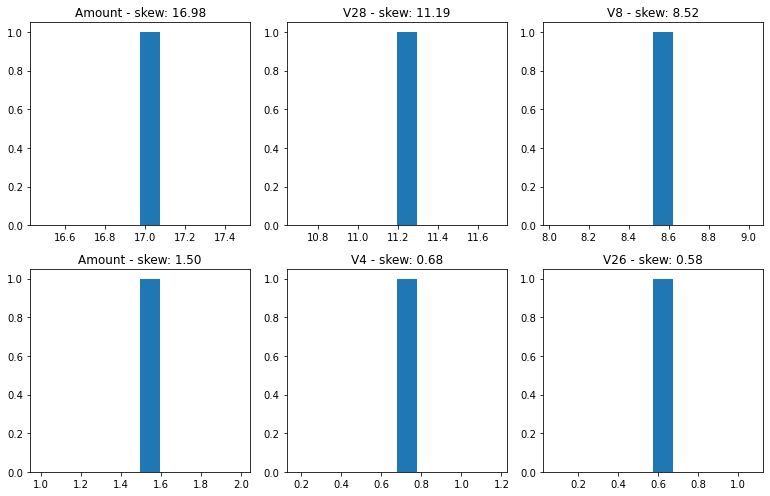

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=[10.8, 7])

def plot_skew(X, ax):
    X_skew = X.skew().apply(np.abs).sort_values(ascending=False)
    columns = X_skew.head(3).index
    for ax, column in zip(ax, columns):
        ax.hist(X_skew[column])
        ax.set_title('{} - skew: {:.2f}'.format(column, X_skew[column]))
        plt.tight_layout()

X_skew = X.skew().apply(np.abs).sort_values(ascending=False)
norm_col = X_skew[X_skew>0.75].index

plot_skew(X, ax1)

X[norm_col] = X[norm_col].apply(np.cbrt)

plot_skew(X, ax2)

In [28]:
print('Shape of the DataFrame:', X.shape)
print('-'*10)
X.head()

Shape of the DataFrame: (284807, 30)
----------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.107879,-0.417516,1.363755,1.378155,-0.696802,0.773278,0.621100,0.462135,0.363787,...,0.631144,-0.263555,0.277838,-0.479829,0.066928,0.128539,-0.189115,0.511160,-0.276125,5.308802
1,0.0,1.060249,0.643244,0.550116,0.448154,0.391525,-0.435084,-0.428727,0.439858,-0.255425,...,-0.410321,-0.608918,-0.638672,0.466143,-0.339846,0.167170,0.125895,-0.207878,0.245100,1.390755
2,1.0,-1.107485,-1.102518,1.210375,0.379780,-0.795389,1.216553,0.925003,0.628002,-1.514654,...,0.806704,0.628275,0.771679,0.968843,-0.689281,-0.327642,-0.139097,-0.381107,-0.390946,7.234633
3,1.0,-0.988628,-0.570034,1.214860,-0.863291,-0.217639,1.076413,0.619376,0.722683,-1.387024,...,-0.592535,-0.476662,0.005274,-0.575213,-1.175575,0.647376,-0.221929,0.397321,0.394632,4.979919
4,2.0,-1.050184,0.957462,1.156975,0.403034,-0.741197,0.457761,0.840112,-0.646755,0.817739,...,0.742014,-0.211275,0.798278,-0.516088,0.141267,-0.206010,0.502292,0.603152,0.599215,4.121089


In [29]:
from imblearn.under_sampling import RandomUnderSampler

X_resample, y_resample = RandomUnderSampler().fit_resample(X, y)

In [30]:
print('New shape of the DataFrame:', X_resample.shape)
print('-'*10)
print('New class distribution:')
print(y_resample.value_counts(normalize=True))
print('-'*10)

New shape of the DataFrame: (984, 30)
----------
New class distribution:
0    0.5
1    0.5
Name: Class, dtype: float64
----------


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Inertia')

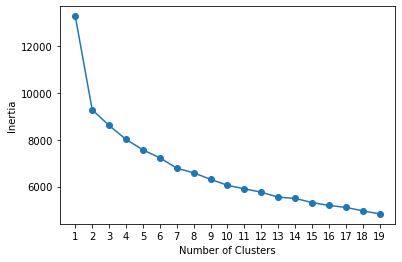

In [38]:
from sklearn.cluster import KMeans

inertia = []
clusters = np.arange(1, 20)
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(clusters, inertia)
plt.scatter(clusters, inertia)
plt.xticks(np.arange(clusters.min(), cluster.max()+1))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [39]:
kmeans = KMeans(n_clusters=3)
X_resample = pd.concat([
    X_resample, pd.get_dummies(pd.Series(kmeans.fit_predict(X_resample)), prefix='kmeans_cluster')
], axis=1)

LogisticRegression(random_state=42) F1 score for Fraud: 95%
RandomForestClassifier(random_state=42) F1 score for Fraud: 93%
BaggingClassifier(random_state=42) F1 score for Fraud: 91%
ExtraTreesClassifier(random_state=42) F1 score for Fraud: 93%
GradientBoostingClassifier(random_state=42) F1 score for Fraud: 92%
AdaBoostClassifier(random_state=42) F1 score for Fraud: 95%
SVC(random_state=42) F1 score for Fraud: 92%


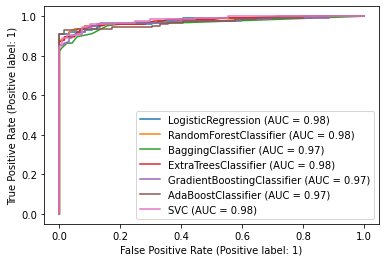

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, f1_score, plot_roc_curve

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample)

models = [LogisticRegression(max_iter=100), RandomForestClassifier(), BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), SVC()]
fig, ax = plt.subplots(1, 1)
for model in models:
    model.set_params(**{'random_state': 42})
    model.fit(X_train, y_train)
    print('{} F1 score for Fraud: {:.0%}'.format(model, f1_score(model.predict(X_test), y_test, pos_label=1)))
    plot_roc_curve(model, X_test, y_test, ax=ax)
    

In [41]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

################################
# RandomForestClassifier or ExtraTreesClassifier
in_model = RandomForestClassifier(n_jobs=-1)
params = {'n_estimators': [10, 100, 1000],
          'max_depth': [1, 10, 100]}
################################
# LogisticRegression
# in_model = LogisticRegression(n_jobs=-1, random_state=42)
# params = {'max_iter': [100, 500, 1000],
#           'C': [0.001, 0.01, 0.1, 1],
#          'solver': ['sag', 'saga']}

model = GridSearchCV(in_model, param_grid=params, scoring='f1', n_jobs=-1)
model.fit(X_train, y_train)

grid_best_params = model.best_params_
print(model.best_params_)
print('-'*10)
print('default scoring: {:.0%}'.format(model.score(X_test, y_test)))
print('-'*10)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

{'max_depth': 10, 'n_estimators': 100}
----------
default scoring: 93%
----------
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       135
           1       0.88      0.99      0.93       111

    accuracy                           0.93       246
   macro avg       0.94      0.94      0.93       246
weighted avg       0.94      0.93      0.94       246



In [52]:
import pickle
pickle.dump(model, open('models/model.pickle', 'wb'))

In [42]:
kmeans = KMeans(n_clusters=3)
X = pd.concat([
    X, pd.get_dummies(pd.Series(kmeans.fit_predict(X)), prefix='kmeans_cluster')
], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = in_model.set_params(**grid_best_params)
model.fit(X_train, y_train)

print('default scoring: {:.0%}'.format(model.score(X_test, y_test)))
print('-'*10)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

default scoring: 100%
----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71100
           1       0.77      0.95      0.85       102

    accuracy                           1.00     71202
   macro avg       0.88      0.98      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [53]:
pickle.dump(model, open('models/randomforestmodel_under_sample.pickle', 'wb'))

GradientBoostingClassifier {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 90} = 0.76

LogisticRegression {'C': 0.1, 'max_iter': 100} = 0.76

RandomForestClassifier {'max_depth': 100, 'n_estimators': 100} = 0.86

ExtraTreesClassifier {'max_depth': 100, 'n_estimators': 100} = 0.83



In [32]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE(n_jobs=-1).fit_resample(X, y)

y_smote.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [44]:
kmeans = KMeans(n_clusters=3)
X = pd.concat([
    X, pd.get_dummies(pd.Series(kmeans.fit_predict(X)), prefix='kmeans_cluster')
], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = in_model.set_params(**grid_best_params)
model.fit(X_train, y_train)

print('default scoring: {:.0%}'.format(model.score(X_test, y_test)))
print('-'*10)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

default scoring: 98%
----------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     73548
           1       0.96      1.00      0.98     68610

    accuracy                           0.98    142158
   macro avg       0.98      0.98      0.98    142158
weighted avg       0.98      0.98      0.98    142158



In [54]:
pickle.dump(model, open('models/randomforestmodel_SMOT.pickle', 'wb'))